In [8]:
import sys
sys.path.append('..')
import conet 
import conet.src.synthetic_data.ratios_distribution as rd
import conet.src.synthetic_data.data_generator as dg
import conet.src.inference_result as ir
import conet.src.conet as c
import conet.src.conet_parameters as cp
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import matplotlib.mlab as mlab
import seaborn as sns

In [9]:
#create CoNETobject for generating random data from the model
data_generator = dg.DataGenerator()

In [10]:
#Generate random event tree
tree = data_generator.generate_random_tree(no_loci=40, tree_size=20)

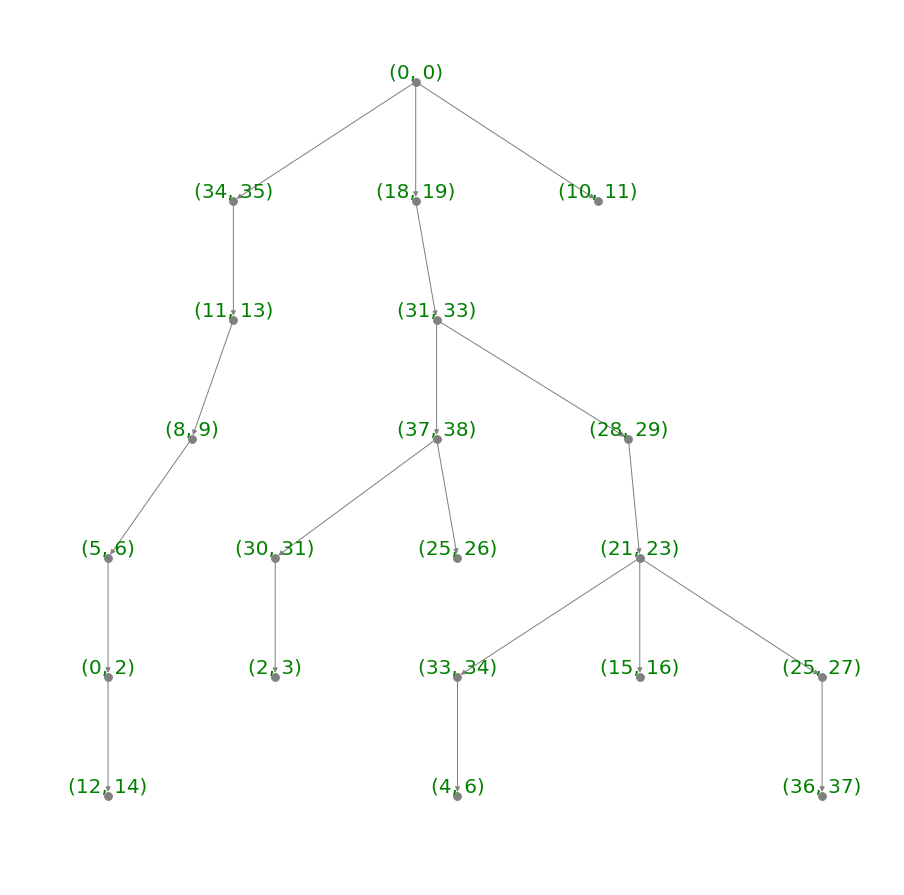

In [11]:
#Plot the tree 
plt.figure(3, figsize=(12,12))
pos = graphviz_layout(tree, prog = "dot")
nx.draw(tree, pos = pos, with_labels=True, node_color = "grey", node_size = 60, verticalalignment = "bottom",
       font_size=20, edge_color="grey", font_color="green")
plt.show()

In [12]:
#Define parameters of distribution which will be used to generate difference matrix
ratios_distribution = rd.RatiosDistribution(weights=[0.2, 0.5, 0.3], 
                                            means=[1.0, 3, 2.5], 
                                            variances=[0.1, 0.6, 0.3], 
                                            var_0=0.3)

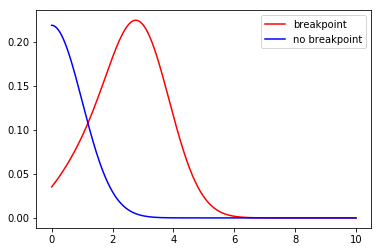

In [13]:
#Plot densities of difference distribution for loci with and without breakpoints
x = np.linspace(0, 10, 1000) 
plt.plot(x, ratios_distribution.apply_density_at_points(x, True), color='red', label="breakpoint") 
plt.plot(x, ratios_distribution.apply_density_at_points(x, False), color='blue', label = "no breakpoint")
plt.legend(loc="upper right")
plt.show() 

In [14]:
#Use sampled tree to generate ratios for 80 cells
input_data = data_generator.generate_random_ratios(no_loci=40, tree=tree, ratios_distribution=ratios_distribution, no_of_cells=80)

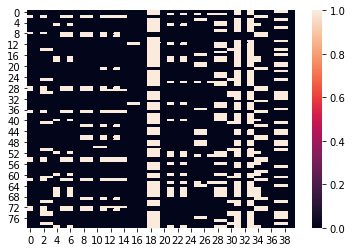

In [15]:
#plot real breakpoint matrix 
sns.heatmap(input_data.bps_matrix[:,:])

In [16]:
#Create CoNET object
conet = c.CoNET("./CoNET")
params = cp.CoNETParameters(data_size_prior_c = 0.01)

In [17]:
conet.infer_tree(params, input_data)

./CoNET ./ 100000 100000 0.0 1.0 0.01 1 12312 4 5 4 10 10 10000 1
b'Input files have been loaded succesfully'
b'Starting parameter estimation'
b'Finished parameter estimation'
b'Estimated breakpoint distribution:'
b'(weight: 0.477257 mean: 0.115598sd: 0.661459)'
b'(weight: 0.522743 mean: 2.69708sd: 0.812005)'
b''
b'Estimated no-breakpoint distribution:'
b'mean: 0 sd: 0.558446'
b''
b'State after 0 iterations:'
b'Tree size: 6'
b'Log-likelihood: -6286.08'
b'State after 10000 iterations:'
b'Tree size: 22'
b'Log-likelihood: -1933.38'
b'State after 20000 iterations:'
b'Tree size: 21'
b'Log-likelihood: -1738.99'
b'State after 30000 iterations:'
b'Tree size: 20'
b'Log-likelihood: -1719.54'
b'State after 40000 iterations:'
b'Tree size: 21'
b'Log-likelihood: -1709.04'
b'State after 50000 iterations:'
b'Tree size: 21'
b'Log-likelihood: -1707.32'
b'State after 60000 iterations:'
b'Tree size: 20'
b'Log-likelihood: -1710.38'
b'State after 70000 iterations:'
b'Tree size: 20'
b'Log-likelihood: -1637.8

In [19]:
#Read inference results
results = ir.InferenceResult("./")

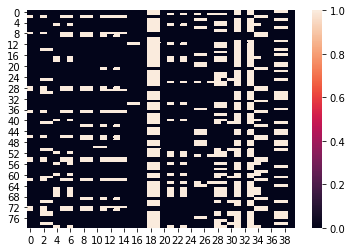

In [20]:
#Plot inferred breakpoint matrix
sns.heatmap(results.bp_matrix)

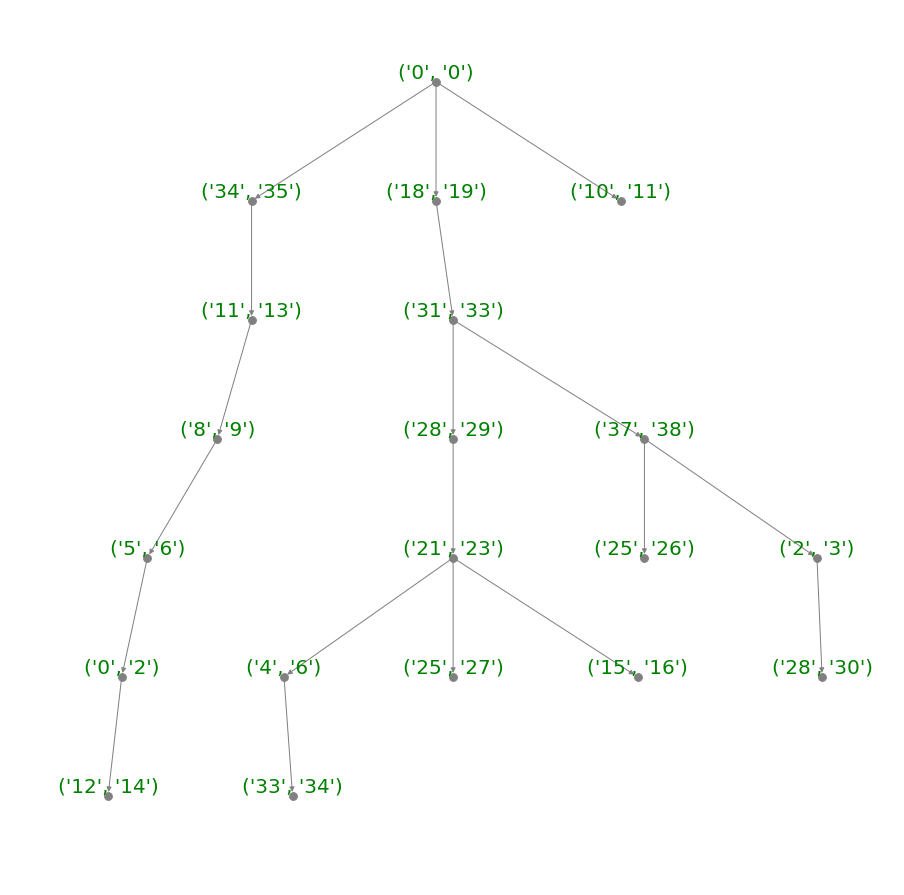

In [21]:
#Plot inferred tree  
plt.figure(3, figsize=(12,12))
pos = graphviz_layout(results.tree, prog = "dot")
nx.draw(results.tree, pos = pos, with_labels=True, node_color = "grey", node_size = 60, verticalalignment = "bottom",
       font_size=20, edge_color="grey", font_color="green")
plt.show()

In [23]:
no_cells = 80
print("Symmetric distance between inferred and real breakpoint matrices:")
print(np.sum(abs(results.bp_matrix - input_data.bps_matrix))/no_cells)


print("\nFalse positive rate:")
print(np.sum(results.bp_matrix > input_data.bps_matrix) / np.sum(results.bp_matrix))


print("\nFalse negative rate:")
print(np.sum(results.bp_matrix < input_data.bps_matrix) / np.sum(input_data.bps_matrix))

print("\nInferred tree size:")
print(len(results.tree.edges))


print("\nReal tree size:")
print(len(tree.edges))

inferred_edges = list(map(lambda x: ((int(x[0][0]),int(x[0][1])),(int(x[1][0]),int(x[1][1]))), results.tree.edges))

print("\nEdge precision:")
print(len(set(inferred_edges).intersection(set(tree.edges))) / len(inferred_edges))


print("\nEdge sensitivity")
print(len(set(inferred_edges).intersection(set(tree.edges))) / len(tree.edges))

Symmetric distance between inferred and real breakpoint matrices:
0.375

False positive rate:
0.0334855403348554

False negative rate:
0.012441679626749611

Inferred tree size:
19

Real tree size:
20

Edge precision:
0.7894736842105263

Edge sensitivity
0.75
